In [89]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sn
import plotly
import plotly.express as px
from matplotlib import pyplot as plt
from autoviz import AutoViz_Class as AV
from prettytable import PrettyTable

%matplotlib inline


from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


df = pd.read_csv("gender.csv")
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [3]:
df.shape #look at the shape

(66, 5)

In [6]:
df.info() #basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [7]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [32]:
df['Gender'].value_counts() #we have equal number of Males and Females

F    33
M    33
Name: Gender, dtype: int64

In [8]:
df.isnull().sum() #no null values 

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [11]:
df['Favorite Color'].value_counts()

Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

In [13]:
df[df['Favorite Color']=='Warm']['Gender'].value_counts(normalize=True) #seems like more females prefer warmer colors

F    0.590909
M    0.409091
Name: Gender, dtype: float64

In [15]:
df[df['Favorite Color']=='Cool']['Gender'].value_counts(normalize=True) #seems like more males prefer cooler colors

M    0.540541
F    0.459459
Name: Gender, dtype: float64

In [16]:
df[df['Favorite Color']=='Neutral']['Gender'].value_counts(normalize=True) #seems like more males prefer more neutral colors

M    0.571429
F    0.428571
Name: Gender, dtype: float64

We can confirm our finding from above with histogram plot

In [27]:
hist = px.histogram(data_frame=df,x='Favorite Color', color='Gender',width=500, height=500)
hist.show()

Now, lets look at different variables and see gender distribution.

In [28]:
hist = px.histogram(data_frame=df,x='Favorite Beverage', color='Gender',width=500, height=500)
hist.show()

In [29]:
hist = px.histogram(data_frame=df,x='Favorite Music Genre', color='Gender',width=500, height=500)
hist.show()

In [30]:
hist = px.histogram(data_frame=df,x='Favorite Soft Drink', color='Gender',width=500, height=500)
hist.show()

Now lets convert categorical features to numerical ones to continue our EDA and then build a model

In [52]:
encoder = LabelEncoder()
df2 = df.copy()
df2['Favorite_Color'] = encoder.fit_transform(df['Favorite Color'])
df2['Favorite_Music_Genre'] = encoder.fit_transform(df['Favorite Music Genre'])
df2['Favorite_Beverage'] = encoder.fit_transform(df['Favorite Beverage'])
df2['Favorite_Soft_Drink'] = encoder.fit_transform(df['Favorite Soft Drink'])
df2['Gender'] = encoder.fit_transform(df['Gender'])

Shape of your Data Set loaded: (66, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################


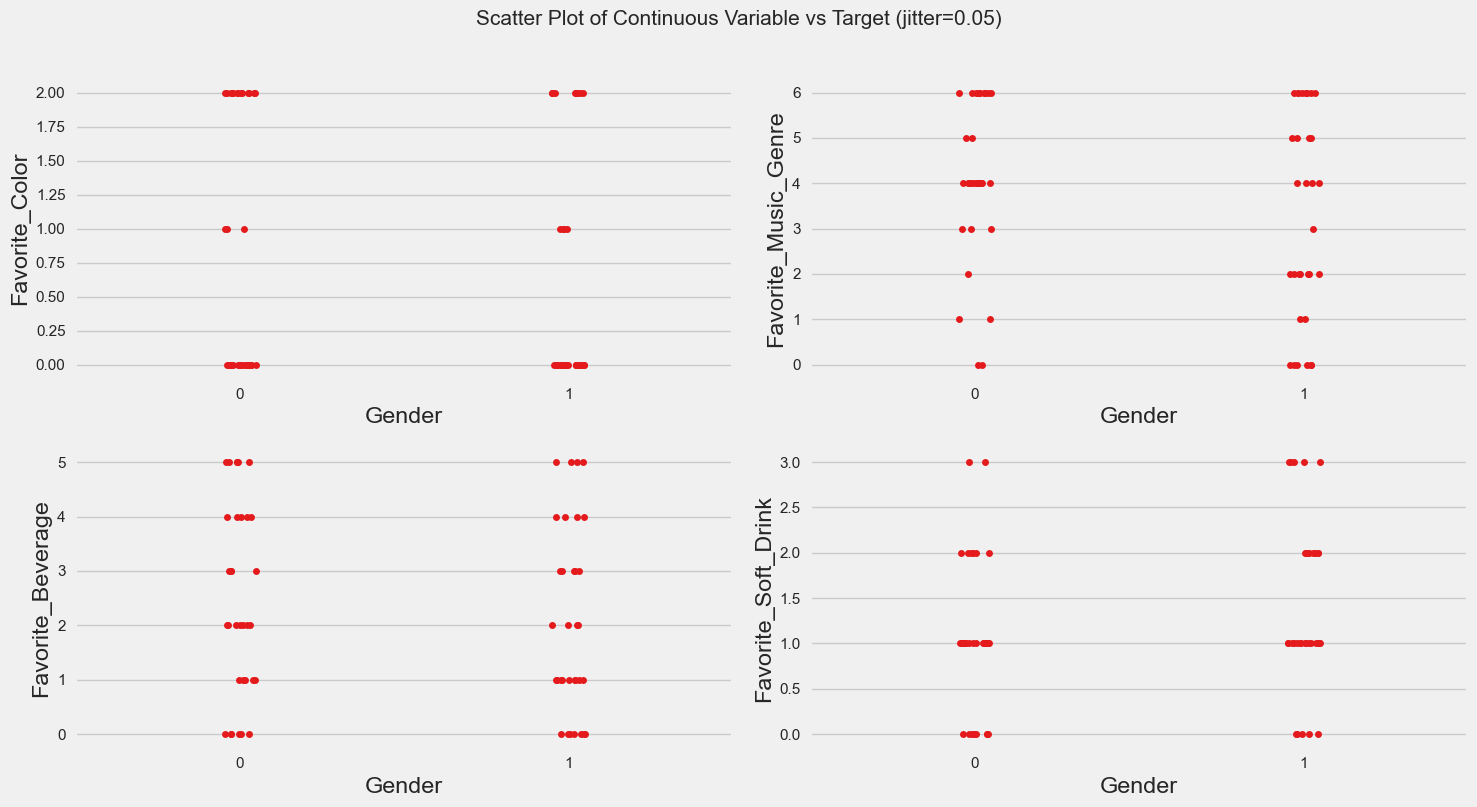

Total Number of Scatter Plots = 10


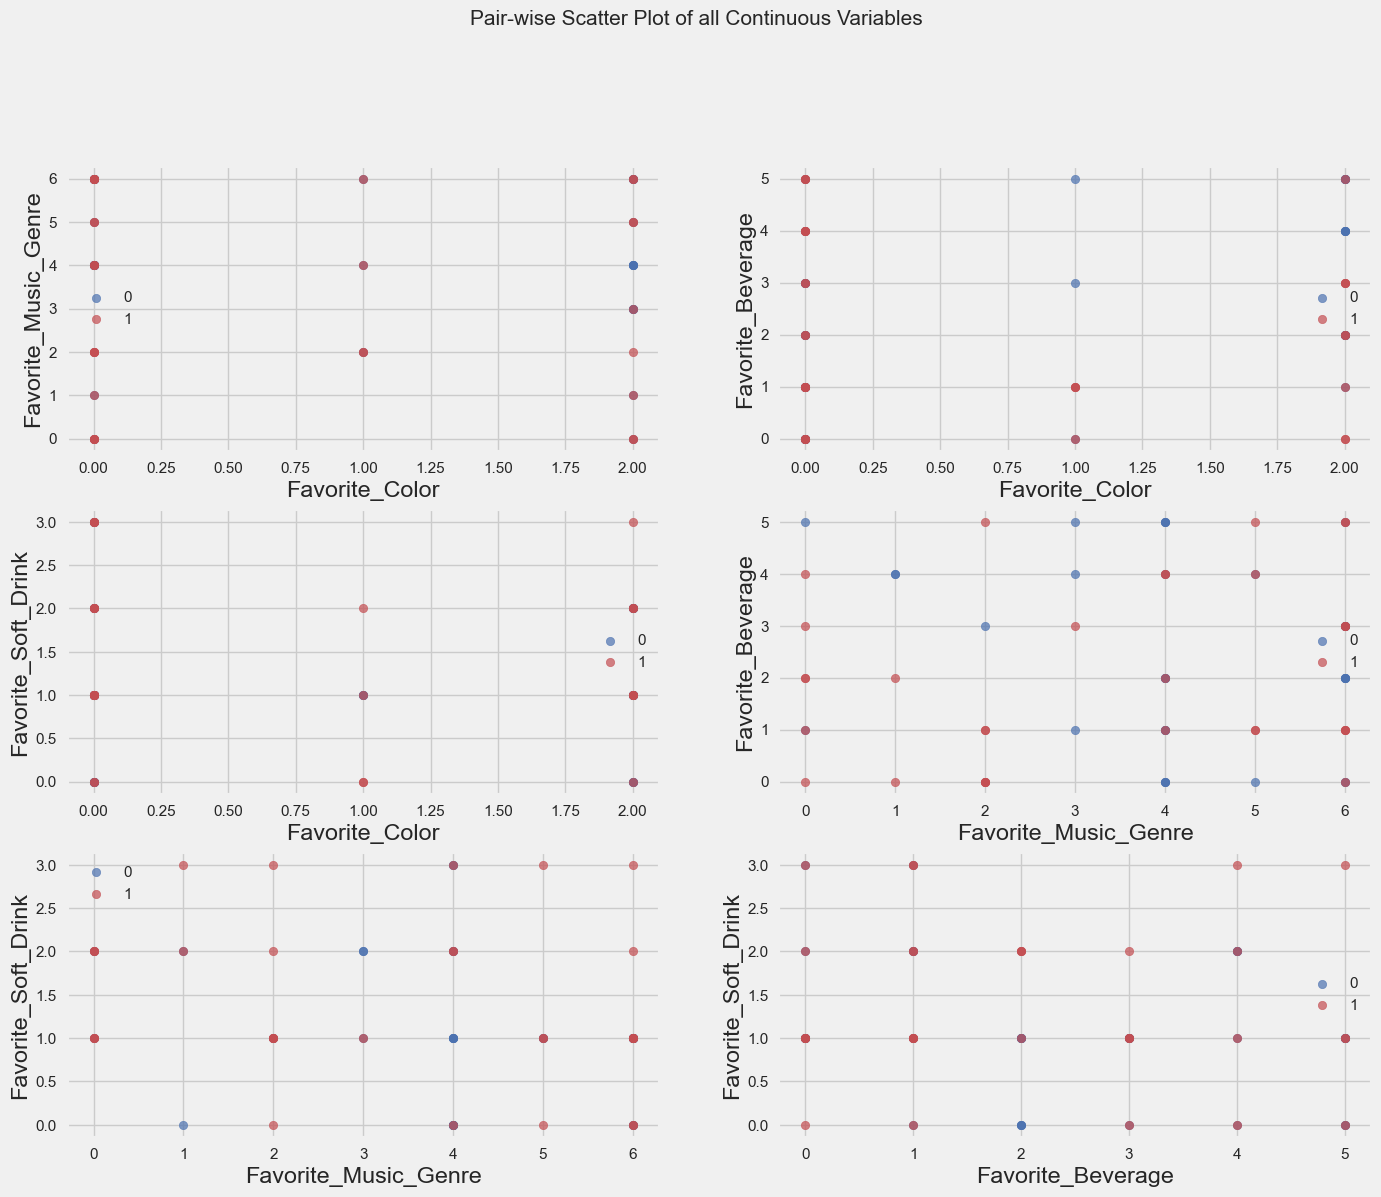

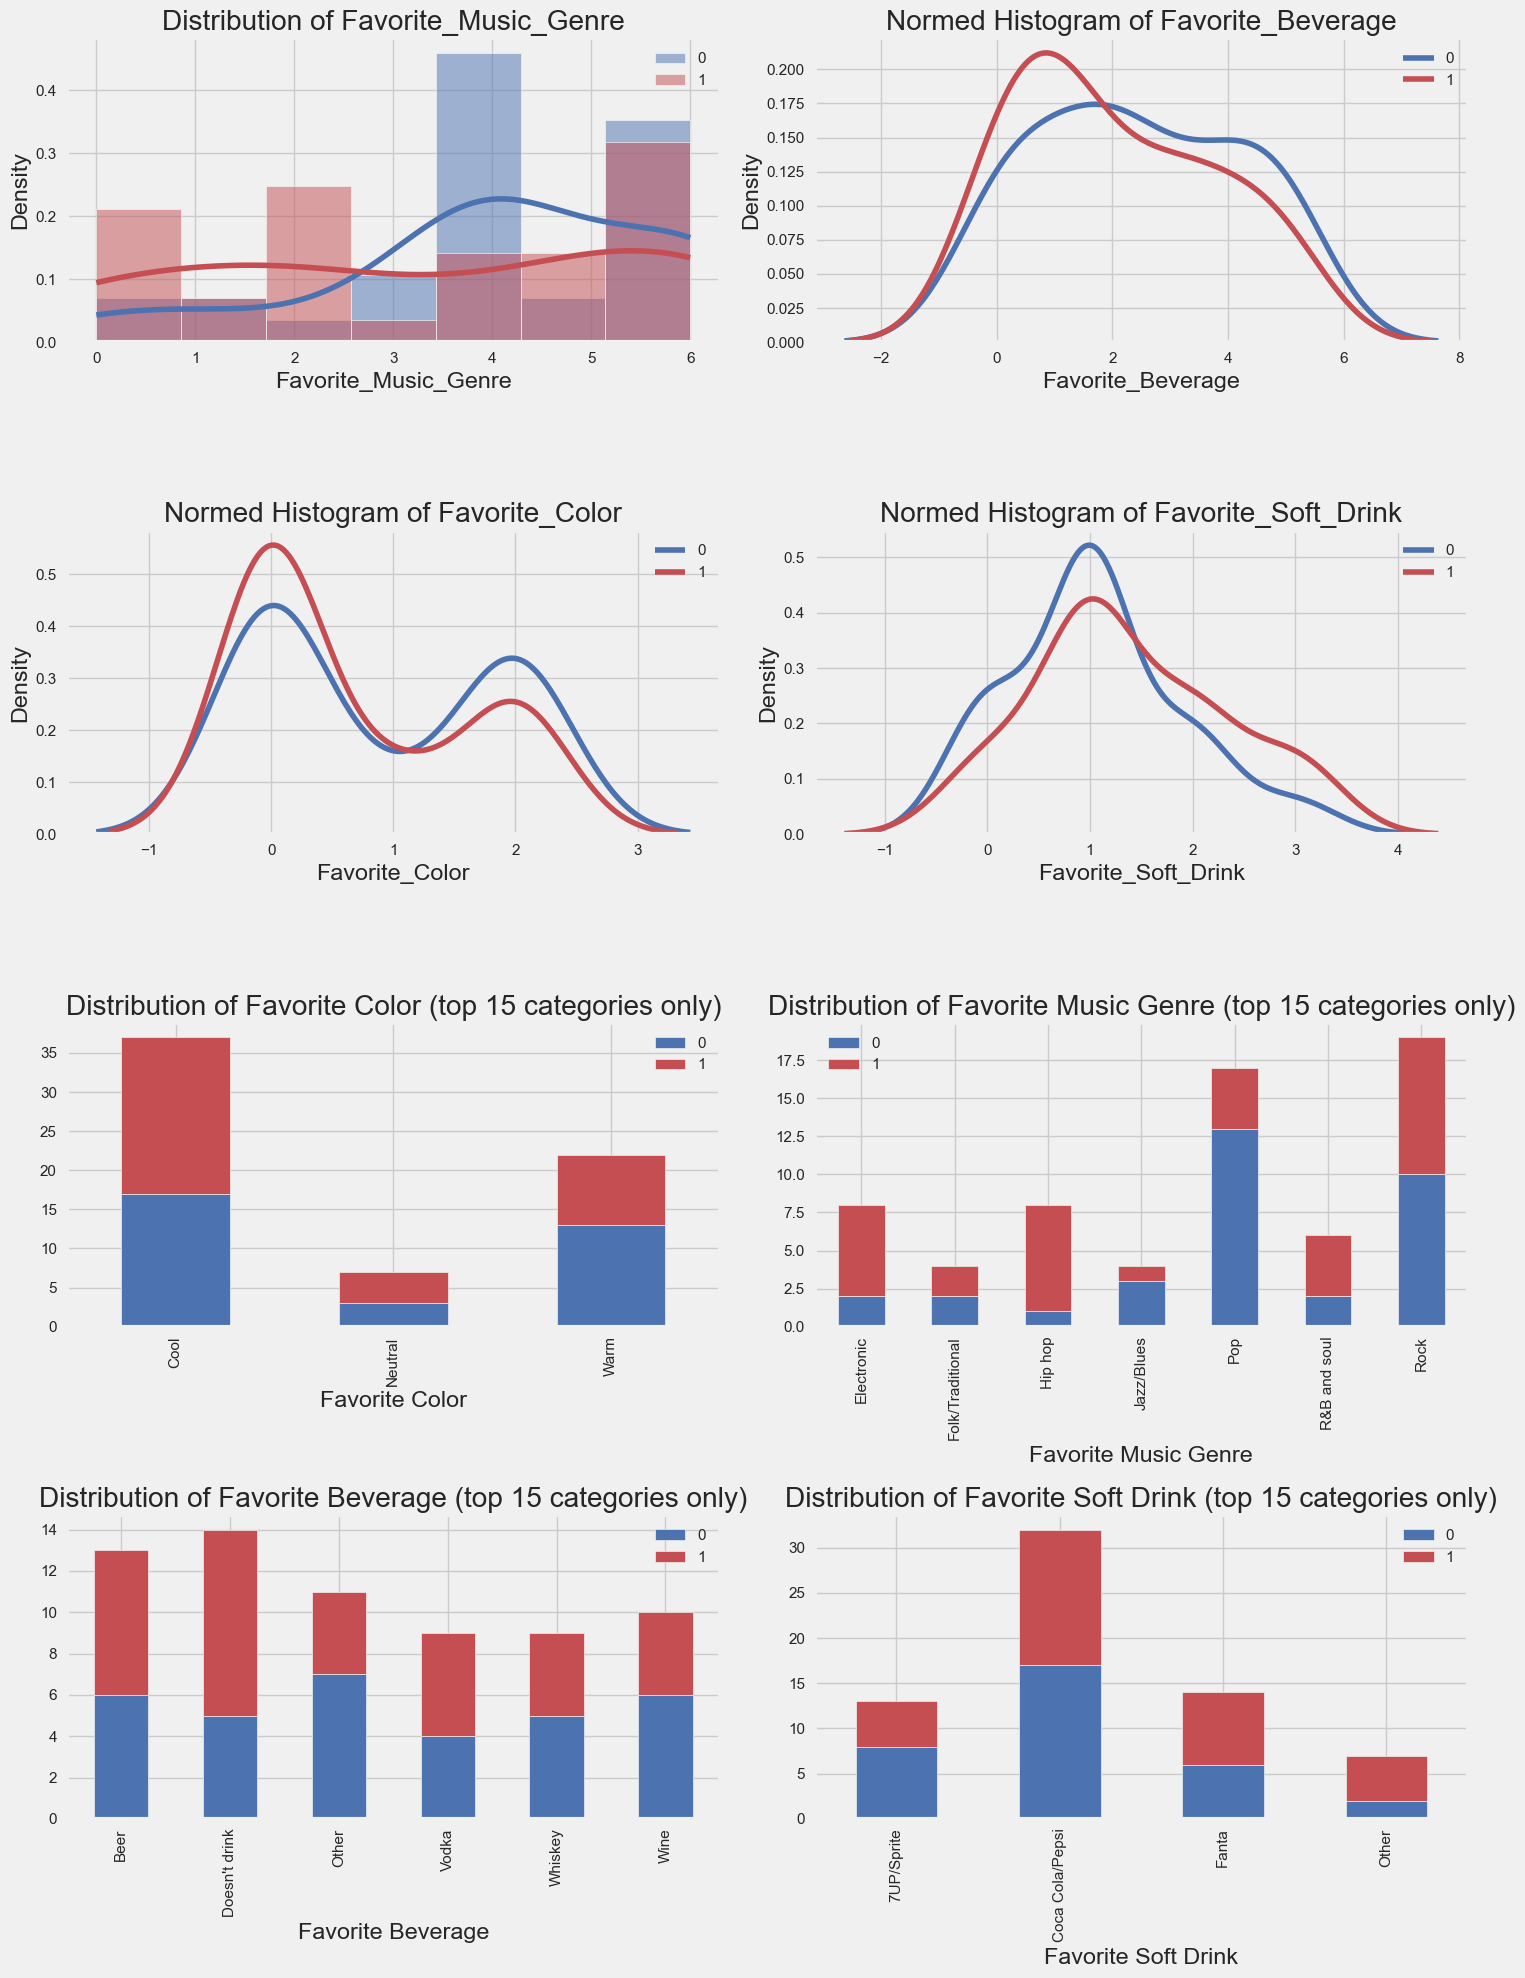

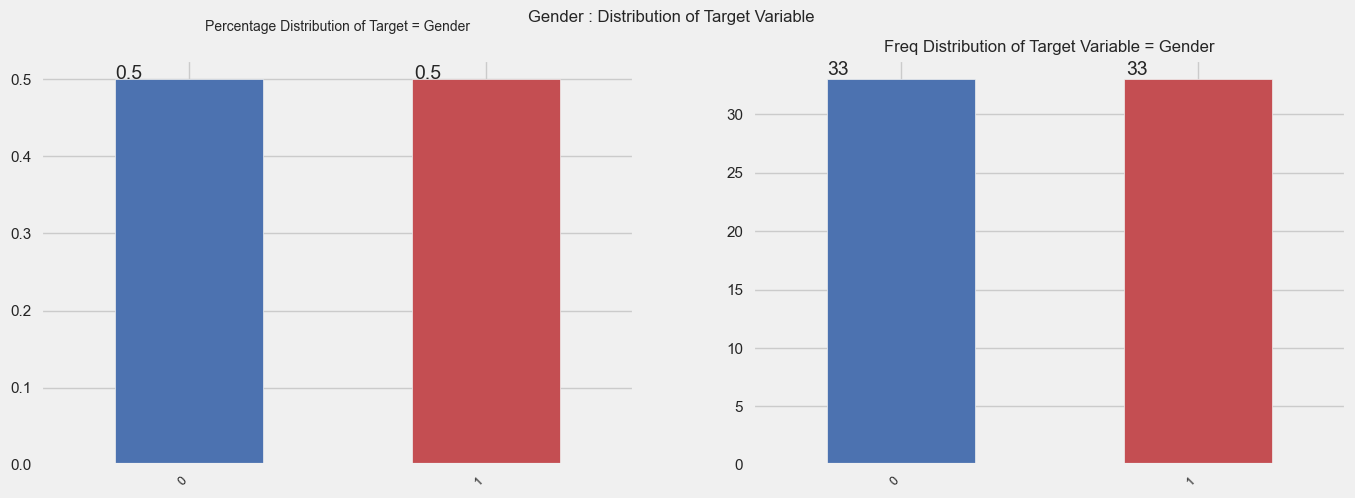

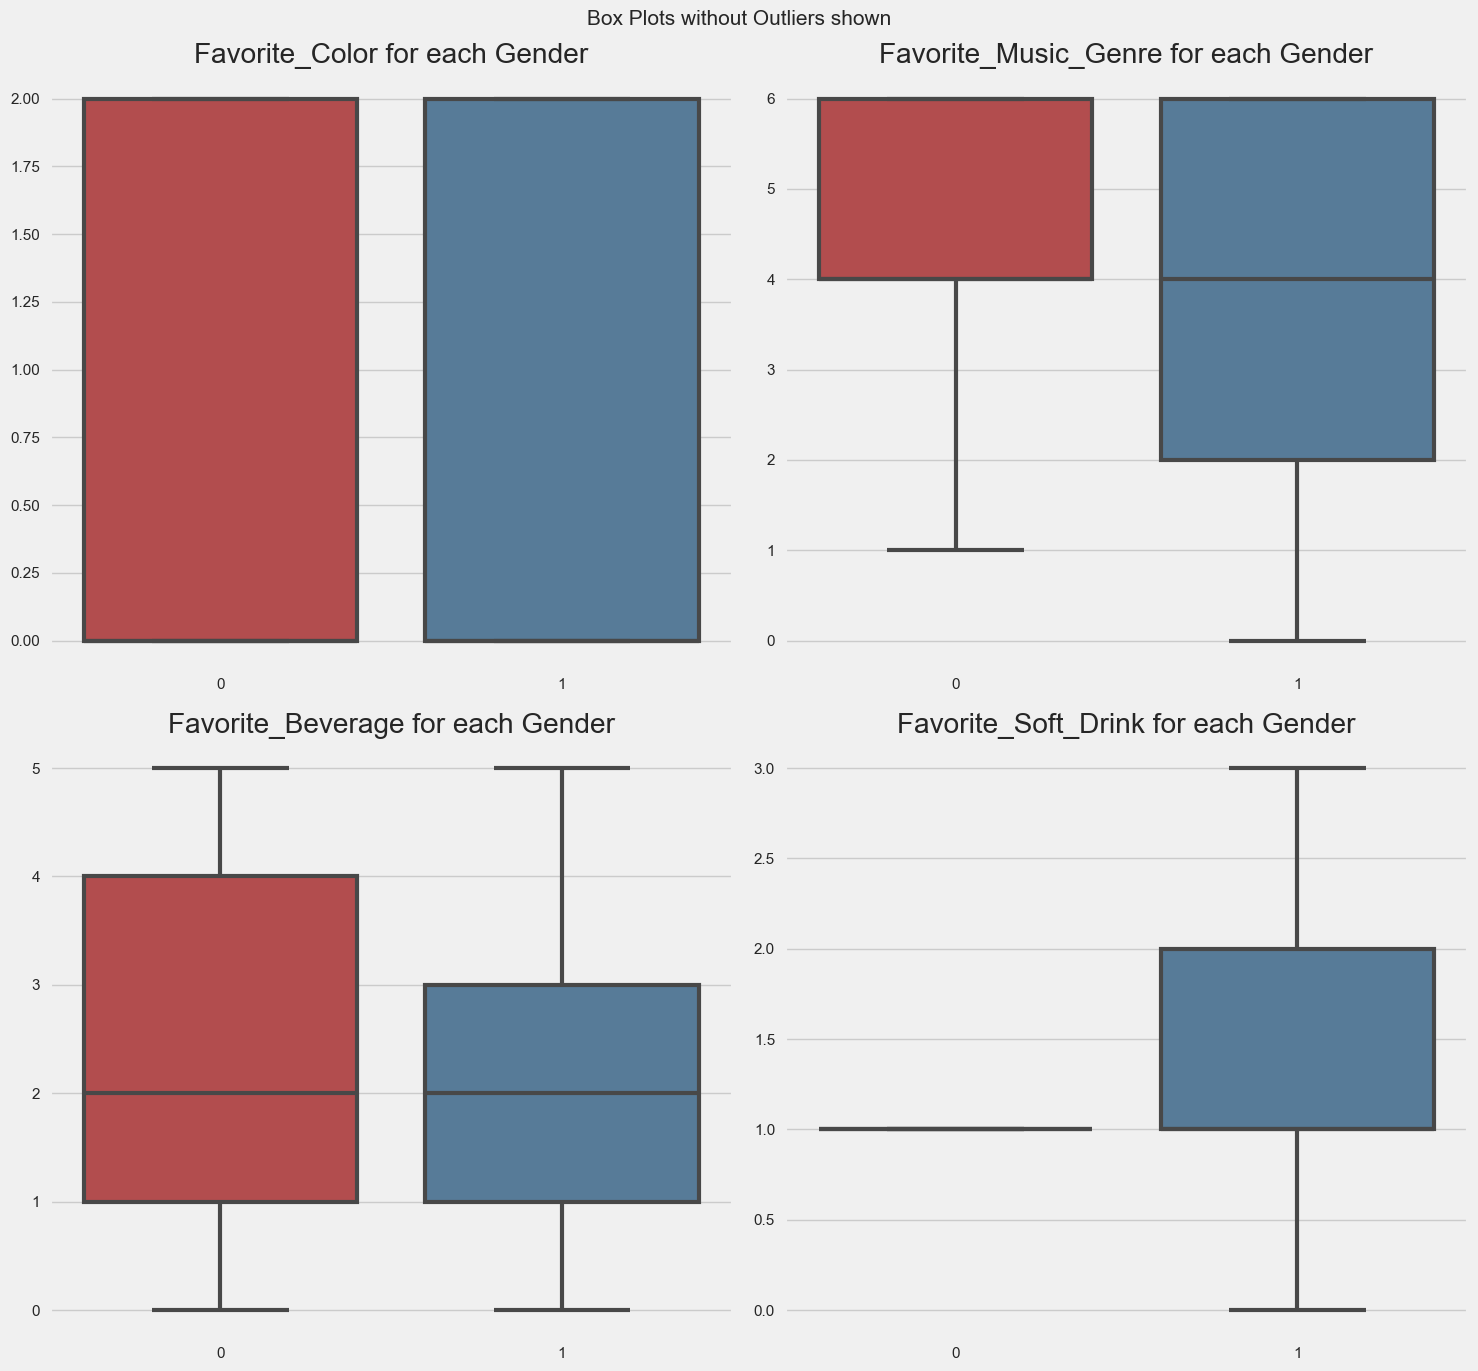

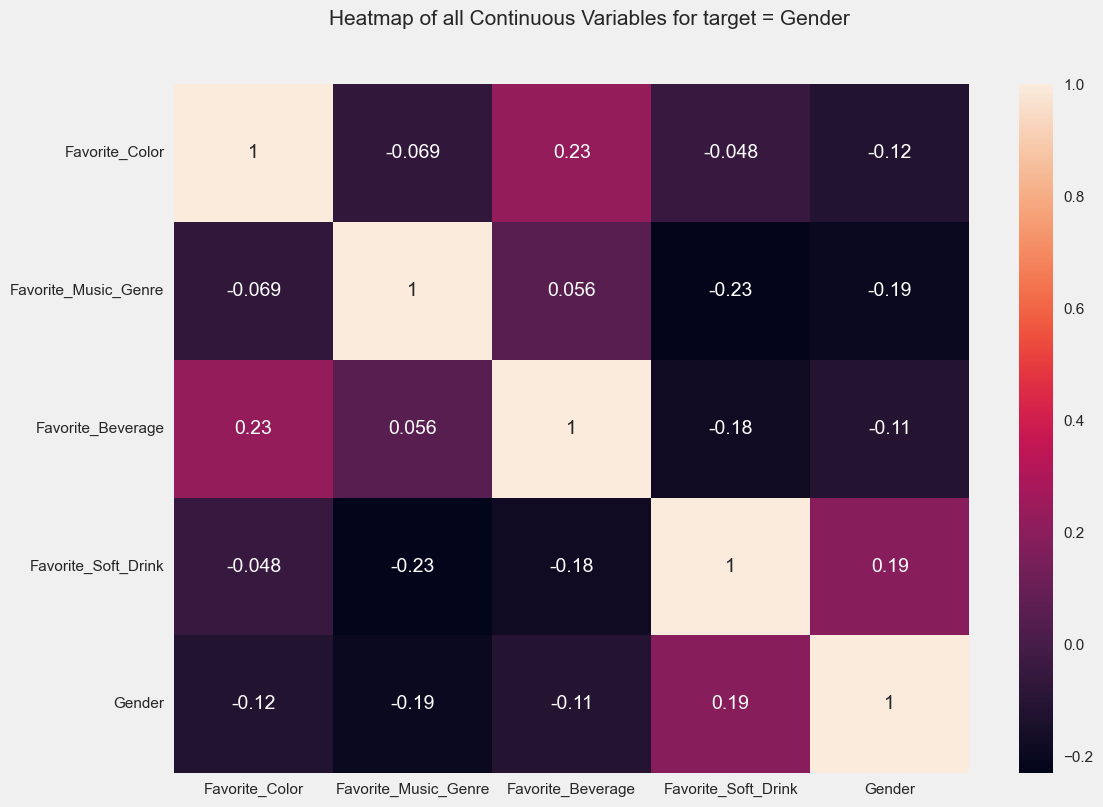

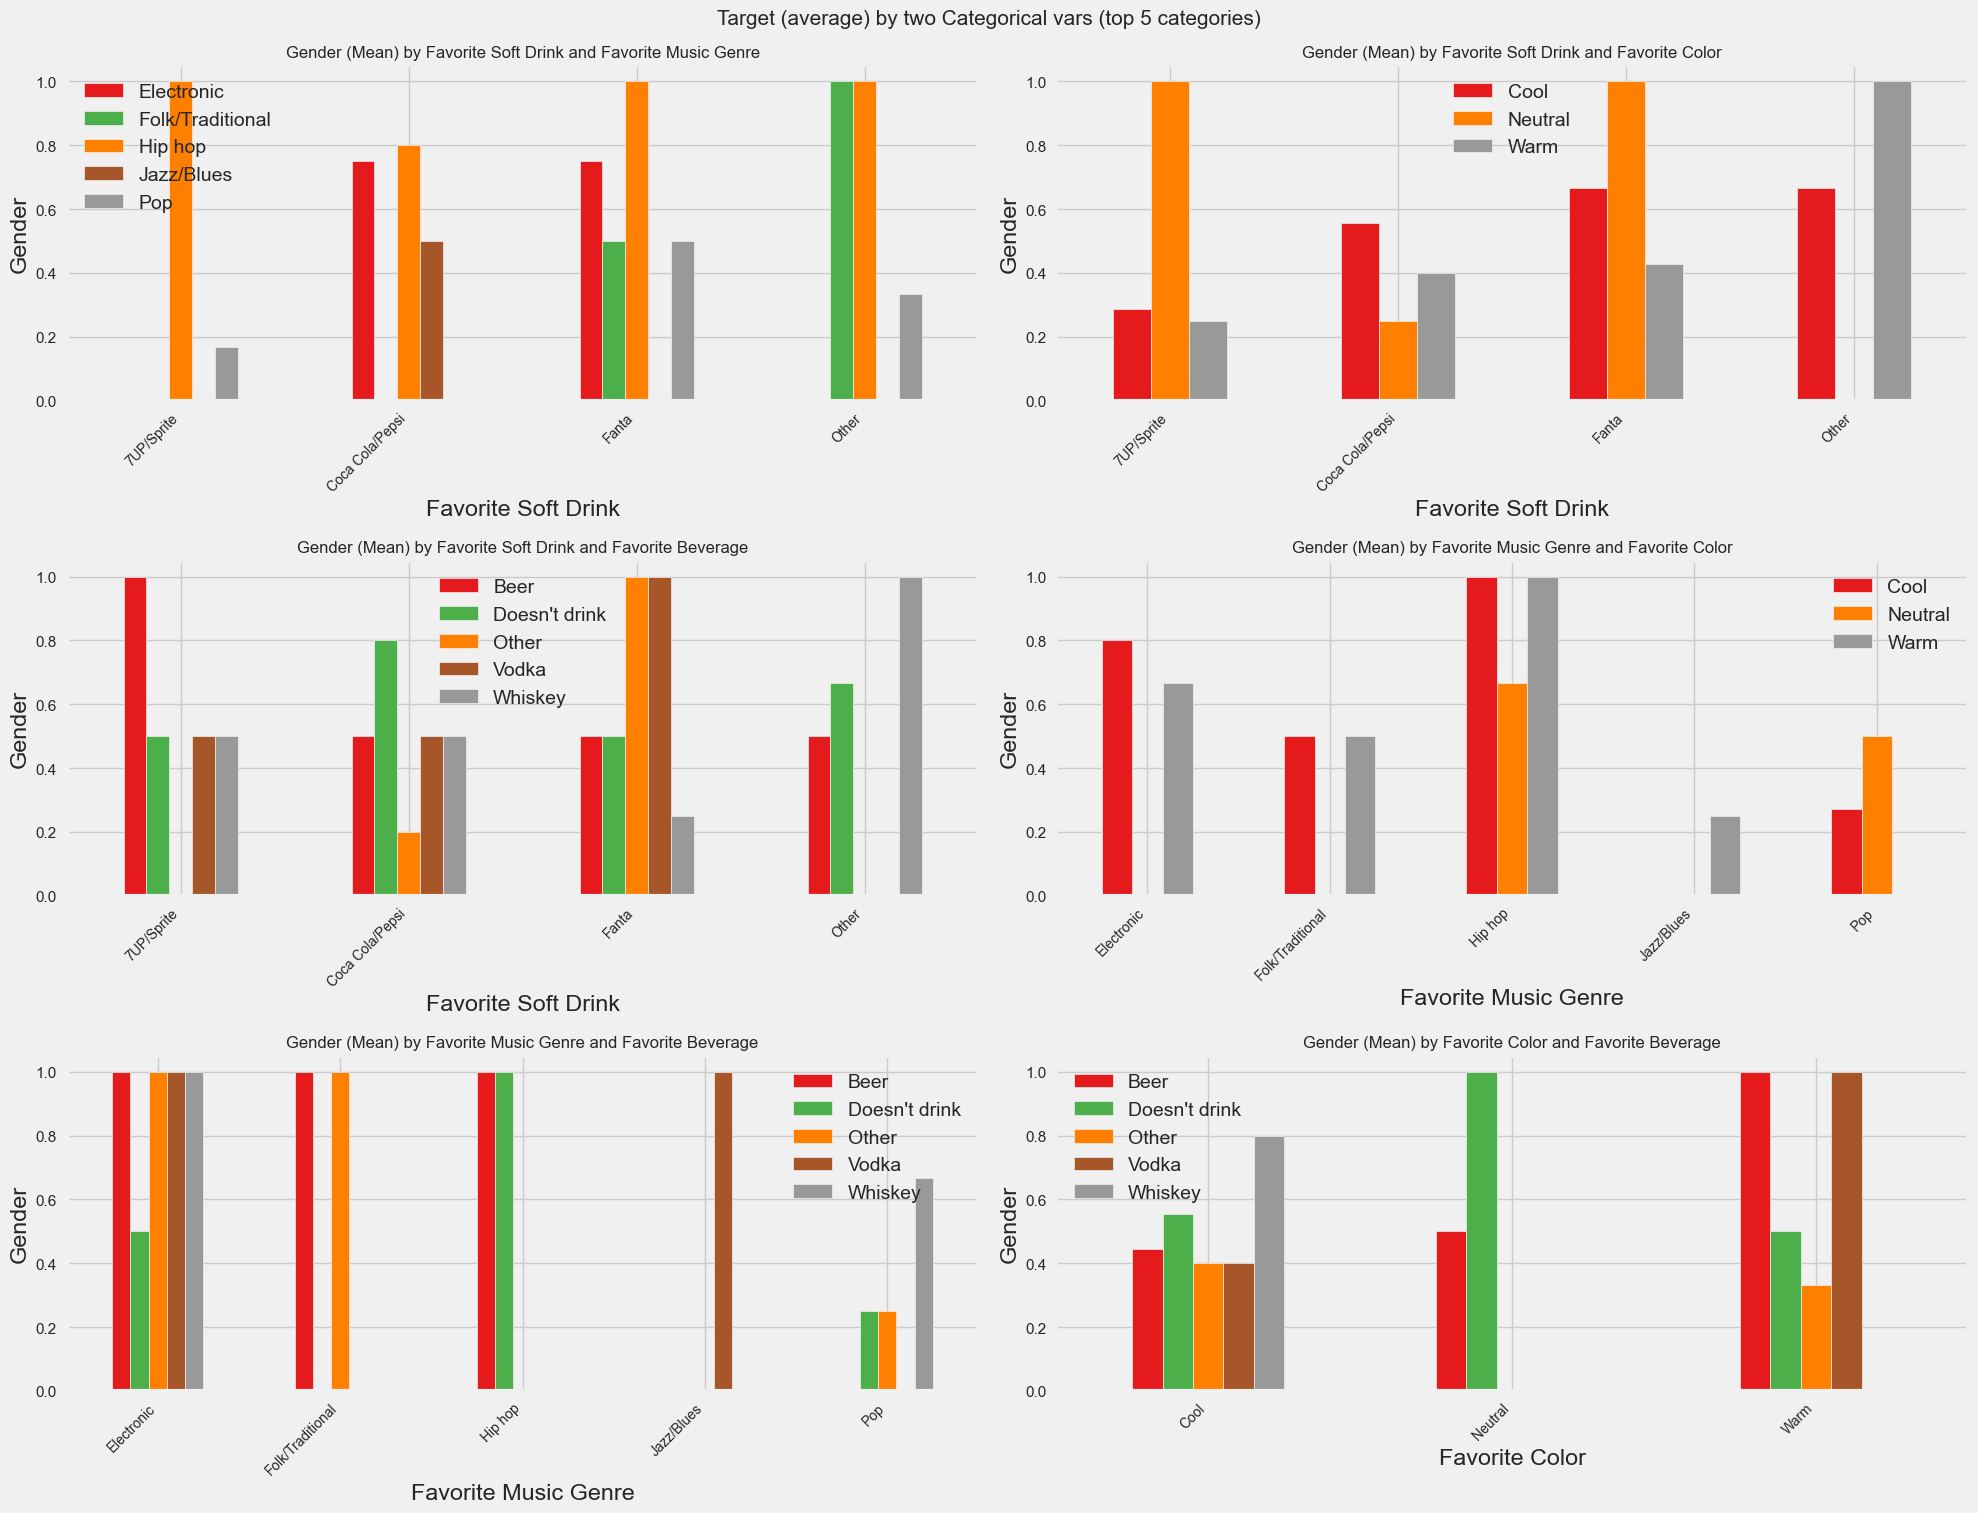

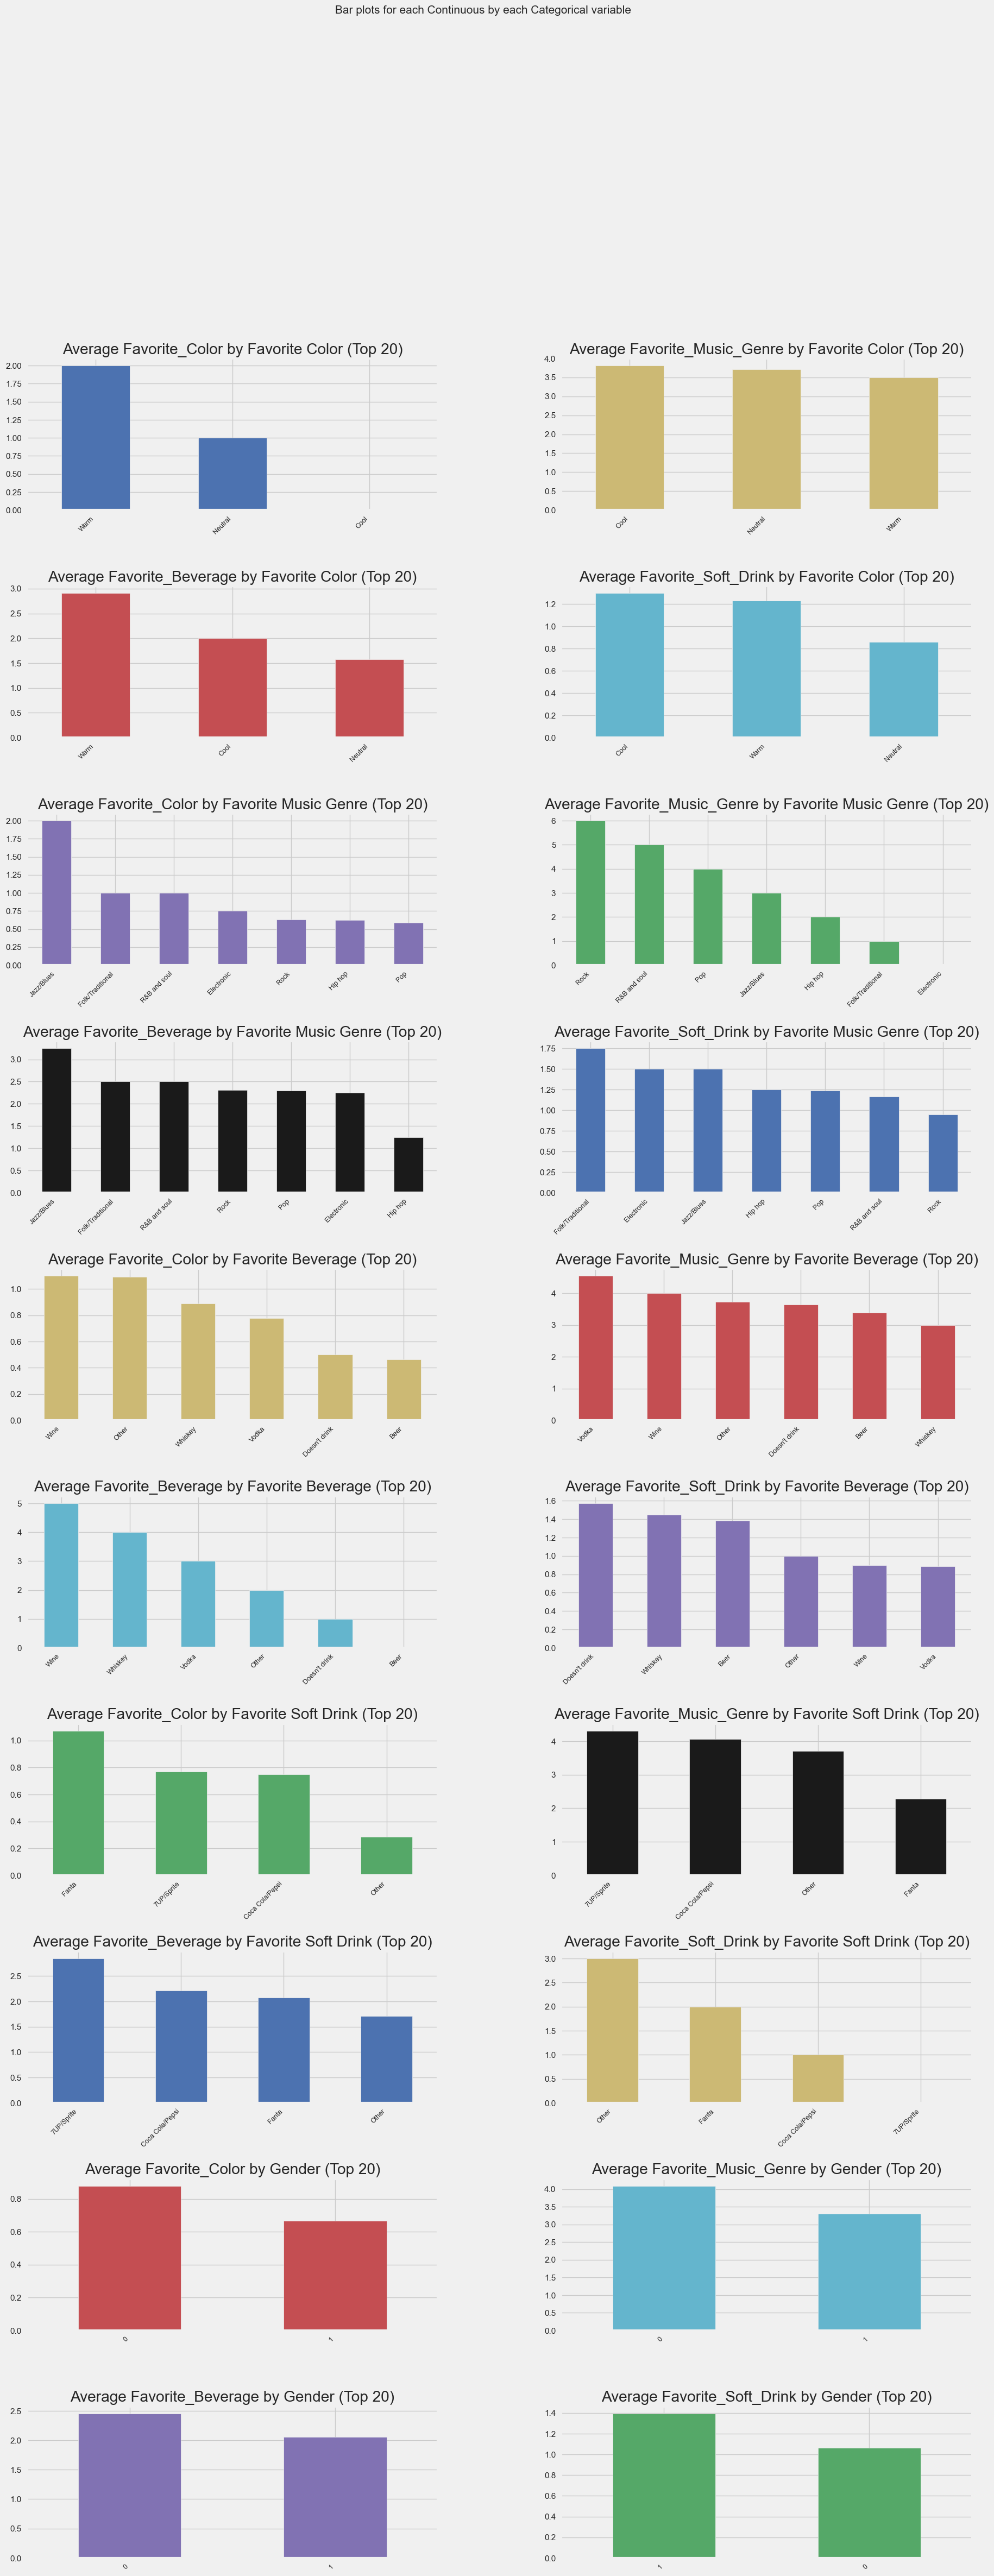

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
Shape of your Data Set loaded: (66, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors classified...
Cannot visualize this dataset since no numeric or integer 

In [53]:
#Look at some visializations that autoviz gives us
av = AV()
dft = av.AutoViz(
    filename="",
    sep=",",
    depVar= "Gender",
    dfte=df2,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

av.AutoViz(filename = "",sep=',', dfte = df, depVar = 'price', verbose = 0, lowess = 1)



     


In [54]:
df2.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,Favorite_Color,Favorite_Music_Genre,Favorite_Beverage,Favorite_Soft_Drink
0,Cool,Rock,Vodka,7UP/Sprite,0,0,6,3,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0,1,2,3,1
2,Warm,Rock,Wine,Coca Cola/Pepsi,0,2,6,5,1
3,Warm,Folk/Traditional,Whiskey,Fanta,0,2,1,4,2
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0,0,6,3,1


In [60]:
df_training = df2.drop(["Favorite Color" , "Favorite Music Genre", "Favorite Beverage", "Favorite Soft Drink" , "Gender"], axis= 1  )
df_training.head()



,Favorite_Color,Favorite_Music_Genre,Favorite_Beverage,Favorite_Soft_Drink
0,0,6,3,0
1,1,2,3,1
2,2,6,5,1
3,2,1,4,2
4,0,6,3,1


<AxesSubplot: >

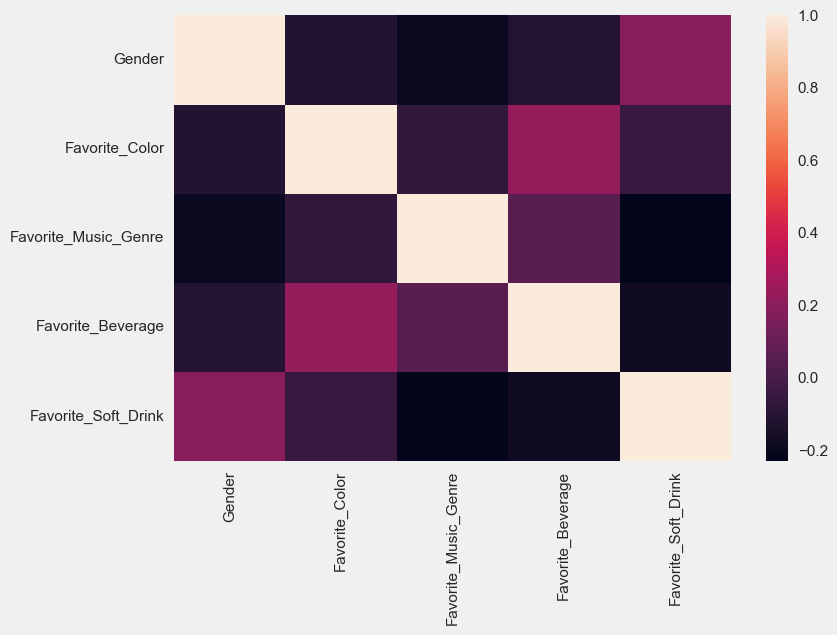

In [63]:
corr = df2.corr()
sn.heatmap(corr)

In [68]:
X = df2.drop(['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink','Gender','Gender'], axis=1)
Y = df2['Gender']


In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [74]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
predict = lr_model.predict(X_test)

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.50      0.67      0.57         6

    accuracy                           0.57        14
   macro avg       0.58      0.58      0.57        14
weighted avg       0.60      0.57      0.57        14



In [75]:
#lets try support vector classifier now
svc_model = SVC()
svc_model.fit(X_train,Y_train)
predict = svc_model.predict(X_test)

print(classification_report(Y_test,predict))



              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.80      0.67      0.73         6

    accuracy                           0.79        14
   macro avg       0.79      0.77      0.78        14
weighted avg       0.79      0.79      0.78        14



Support Vector Classifier Performs better with better F1 Score and accuracy as well.

In [81]:
# now lets try deccision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
predict = dt_model.predict(X_test)

print(classification_report(Y_test,predict))



              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.17      0.29         6

    accuracy                           0.64        14
   macro avg       0.81      0.58      0.52        14
weighted avg       0.78      0.64      0.56        14



Decission Tree classifier performs better than Logistic Regression model but worse than SVC

In [80]:
#now lets try KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(X_train,Y_train)
predict = kn_model.predict(X_test)

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.62      0.83      0.71         6

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14



In [86]:
gb_model2 = GradientBoostingClassifier()
gb_model2.fit(X_train,Y_train)
predict2 = gb_model2.predict(X_test)

print(classification_report(Y_test,predict2))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.62      0.83      0.71         6

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14



Seems like Gradient Boosting Classifier and KNeighbors Classifier have the same accuracy.

In [88]:

x = PrettyTable(["Model", "Avg Accuracy"])
x.add_row(["LogisticRegression","57%"])
x.add_row(["SVC","64%"])
x.add_row(["DecisionTreeClassifier","64.%"])
x.add_row(["KNeighborsClassifier","71%"])
x.add_row(["RandomForestClassifier","60.0"])
x.add_row(["GradientBoostingClassifier","71%"])
print(x)

+----------------------------+--------------+
|           Model            | Avg Accuracy |
+----------------------------+--------------+
|     LogisticRegression     |     57%      |
|            SVC             |     64%      |
|   DecisionTreeClassifier   |     64.%     |
|    KNeighborsClassifier    |     71%      |
| GradientBoostingClassifier |     71%      |
+----------------------------+--------------+


# Conlcusion

We explored the dataset and build several models. Out of 5 different models KNeighborsClassifier and Gradient Boosting Classifier have the highest accuracy of 71%. I think the result we got is not too bad considering the amount of training data we had.I am confident that if we increase the number of data samples, we will improve our model even more.